# Financial News Strategy | 2. Sentence Embeddings

### Open article on [Medium]() | [Colab]() | [Github]()

[SciQnt.com](https://www.sciqnt.com) makes things easier. Try it out.

<div class="alert alert-block alert-info">
<b>Disclaimer:</b> Our strategies are tailored to specific input data and desired outcomes, which means the results presented here may not fully apply to your unique situation. The primary goal is to expose you to various approaches and key considerations. Additionally, please understand that the stock market is highly complex and constantly evolving; predicting returns is challenging, and no strategy is foolproof. Moreover, we want to be transparent about our use of state-of-the-art Large Language Models (LLMs) in our research. While these tools are invaluable, particularly in the writing process, they cannot independently conduct the research. They are used to augment our efforts, not replace them.
</div>

### Related Articles
- [Financial News Strategy | 1. Sourcing Financial News]()
- [Financial News Strategy | 2. Sentence Embeddings (This Article)]()
- [Financial News Strategy | 3. Embeddings Dimensionality Reduction]() **to be released
- [Financial News Strategy | 4. Clustering Financial News]() **to be released

---

### Background
In the fast-paced world of financial news and behavioral finance, each piece of information contains both fundamental and non-fundamental elements. The challenge lies in sifting through the overwhelming noise and massive influx of data that surpass human processing capabilities. But what if we could identify patterns within this data? Better yet, what if we could use computers to do it for us? Today, we are fortunate to have access to open-source models that make text comprehensible to machines. This process, known as ‘Sentence Embeddings,’ has revolutionized AI and deep learning. By converting textual data into meaningful numerical representations, sentence embeddings empower us to discern market sentiment, spot emerging trends, and predict financial movements with unprecedented efficiency and accuracy.

### Introduction
Once we have collected financial news, the next step is to automate its interpretation. This means transforming the raw data for downstream applications like detecting trending topics through clustering or performing sentiment analysis. At the heart of this transformation is 'Sentence Embeddings,' which convert complex textual data into meaningful numerical vectors. This article delves into how to leverage pre-trained models to transform your data, enabling you to extract deeper insights and make more informed decisions in the dynamic world of finance.

In [1]:
%%capture
# Install the necessary packages
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

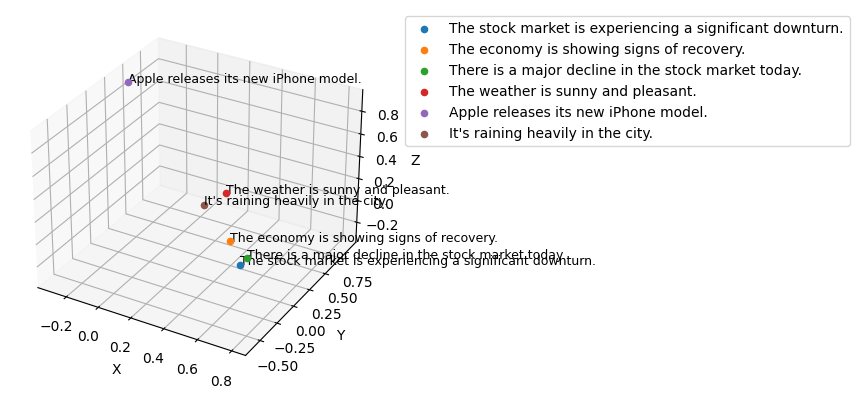

In [2]:
# Install the necessary packages
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Example vectors
vectors = {
    "The stock market is experiencing a significant downturn.": [0.8, -0.6, 0.3],
    "The economy is showing signs of recovery.": [0.7, -0.5, 0.4],
    "There is a major decline in the stock market today.": [.8, -0.5, 0.3],
    "The weather is sunny and pleasant.": [0.1, 0.9, -0.2],
    "Apple releases its new iPhone model.": [-0.3, 0.4, 0.9],
    "It's raining heavily in the city.": [0.0, 0.8, -0.3]
}

# Creating the plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plotting each vector
for label, vec in vectors.items():
    ax.scatter(vec[0], vec[1], vec[2], label=label)
    ax.text(vec[0], vec[1], vec[2], label, fontsize=9)

# Setting labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.show()

This example illustrates how sentence embeddings map sentences to corresponding vectors in a numerical space. Although we have manually assigned these vectors for demonstration purposes, in practice, pre-trained models handle this complex task. Sentence embeddings enable us to mathematically derive relationships between sentences. Observing the chart above, we see that "The stock market is experiencing a significant downturn." is very close to "There is a major decline in the stock market today." These sentences share a similar context and sentiment, hence their proximity. In contrast, "The economy is showing signs of recovery." is somewhat further away, reflecting its different sentiment while still being related to economic context. This demonstrates how embeddings capture nuanced relationships between sentences, allowing for sophisticated text analysis.

This is a quite modest explanation of sentence embeddings. In case you're unfamiliar with it and want to understand more about it take a look at the resources:
 - [Sentence Transformers Documentation - SBERT](https://sbert.net)
 - [Hugging Face Transformers Documentation](https://huggingface.co/docs/transformers/en/index)
 - [TenserFlow Tutorials](https://www.tensorflow.org/hub/tutorials)
 - [Google Universal Sentence Encoder](https://static.googleusercontent.com/media/research.google.com/en//pubs/archive/46808.pdf)
 - [FastText Documentation](https://fasttext.cc/docs/en/support.html)
 - [spaCy Documentation](https://spacy.io/api/doc)
 - [The Illustrated BERT, ELMo, and co. by Jay Alammar](http://jalammar.github.io/illustrated-bert/)
 - [Universal Sentence Encoder Colab](https://colab.research.google.com/drive/132E8CG4fRT0Yudxs5eYIm9xD69o242Uw?usp=sharing%3A)
 - [Sentence Embeddings using Siamese BERT-Networks](https://arxiv.org/abs/1908.10084)


----

### Model of Choice: SBERT - [all-MiniLM-L6-v2](https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2)
**SBERT (Sentence-BERT)**, especially the **[all-MiniLM-L6-v2](https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2)** model, stands out as the go-to option for clustering financial news titles. Its blend of efficiency, accuracy, and deep semantic understanding makes it superior to many alternatives. Here's why **SBERT [all-MiniLM-L6-v2](https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2)** often takes the lead:

##### High Quality
SBERT [all-MiniLM-L6-v2](https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2) is exceptional at grasping the nuances of sentence-level semantics. This model is highly effective in understanding and grouping similar financial news titles, where subtle contextual differences can significantly influence clustering outcomes. While USE and DistilBERT offer good semantic understanding, they don't quite match SBERT's fine-tuning for sentence similarity, particularly in the complex world of financial news.

##### Efficiency
Designed to be lightweight, SBERT [all-MiniLM-L6-v2](https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2) shines in large-scale clustering tasks without sacrificing embedding quality. It balances model size and performance perfectly, making it ideal for real-time analysis and handling large datasets. In contrast, DistilBERT, though smaller and faster than full BERT, doesn't capture sentence-level semantics as effectively as SBERT. USE is efficient but tends to be bulkier compared to the sleek SBERT [all-MiniLM-L6-v2](https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2).

##### Versatility and Ease of Use
SBERT is easy to integrate with popular NLP libraries and comes with thorough documentation, making deployment and experimentation straightforward. While USE and DistilBERT are also user-friendly, SBERT's approach to sentence-level embeddings is more refined, making it particularly suited for tasks like clustering and semantic similarity.

##### Pre-Trained on Diverse Data
SBERT [all-MiniLM-L6-v2](https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2) is pre-trained on large, diverse datasets, ensuring it handles various types of financial news robustly. This extensive pre-training means it generalizes well across different contexts and terminologies found in financial titles. FastText and GloVe, in contrast, focus more on word-level embeddings and lack the sophisticated sentence-level training that SBERT excels at.

##### Accuracy in Semantic Matching
The [all-MiniLM-L6-v2](https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2) model is built for highly accurate semantic matching, which is crucial for clustering news titles where context and sentiment are key. USE and DistilBERT also perform well in this area, but they don't quite reach the level of fine-tuning and optimization that SBERT provides specifically for sentence-level tasks.

Here are some of the alternative options summarized, if you want to explore other models and comparison in performance check out the [Massive Text Embedding Benchmark (MTEB) Leaderboard](https://medium.com/r/?url=https%3A%2F%2Fhuggingface.co%2Fspaces%2Fmteb%2Fleaderboard).


1. **[BERT](https://huggingface.co/docs/transformers/en/model_doc/bert) (Bidirectional Encoder Representations from Transformers):**  BERT is a pre-trained language model developed by Google. It captures bidirectional context and has been widely used for various NLP tasks.
Pros: (High accuracy, Captures bidirectional context, Versatile for various NLP tasks)
Cons: (Computationally expensive, Slower inference time, Large memory footprint)
Example Models: bert-base-uncased, bert-large-uncased

2. **[RoBERTa](https://huggingface.co/docs/transformers/en/model_doc/roberta) (Robustly optimized BERT approach):** RoBERTa is an optimized version of BERT by Facebook AI, trained with larger mini-batches and longer sequences.
 Example Models: roberta-base, roberta-large

3. **[ALBERT](https://huggingface.co/docs/transformers/en/model_doc/albert) (A Lite BERT):** ALBERT is a lighter version of BERT that reduces the number of parameters to improve training efficiency and scalability.
Example Models: albert-base-v2, albert-large-v2

4. **[SBERT](https://huggingface.co/sentence-transformers) (Sentence-BERT):** SBERT is a modification of the BERT network to derive semantically meaningful sentence embeddings that can be compared using cosine similarity.
Example Models: [all-MiniLM-L6-v2](https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2), paraphrase-MiniLM-L12-v2

5. **[USE](https://www.tensorflow.org/hub/tutorials/semantic_similarity_with_tf_hub_universal_encoder) (Universal Sentence Encoder):** USE by Google provides versatile sentence embeddings optimized for a variety of tasks and languages.
Example Models: universal-sentence-encoder, universal-sentence-encoder-large

6. **[GloVe](https://nlp.stanford.edu/projects/glove/) (Global Vectors for Word Representation):** GloVe is an unsupervised learning algorithm for obtaining vector representations for words, which can be used to create sentence embeddings by averaging word vectors. 
Example Models: glove.6B.300d, glove.840B.300d

7. **[FastText](https://fasttext.cc):**  FastText by Facebook AI is an extension of the Word2Vec model that uses subword information to create word vectors, which can be used to form sentence embeddings.
Example Models: wiki-news-300d-1M, crawl-300d-2M

8. **[T5](https://huggingface.co/docs/transformers/en/model_doc/t5) (Text-to-Text Transfer Transformer):** T5 by Google treats all NLP tasks as a text-to-text problem, which can be used to generate embeddings from sentence representations.
Example Models: t5-small, t5-large

9. **[XLNet](https://huggingface.co/docs/transformers/en/model_doc/xlnet):** XLNet is an auto-regressive pre-trained language model that combines the best of both autoregressive and autoencoding language models.
• Example Models: xlnet-base-cased, xlnet-large-cased

10. **[ERNIE](https://huggingface.co/docs/transformers/en/model_doc/ernie) (Enhanced Representation through Knowledge Integration):** ERNIE by Baidu integrates knowledge graphs into the pre-training process to enhance the understanding of language context.
Example Models: ernie-1.0, ernie-2.0

11. **[DistilBERT](https://huggingface.co/docs/transformers/en/model_doc/distilbert):** DistilBERT is a smaller, faster, and lighter version of BERT that retains 97% of BERT's language understanding.
Example Models: distilbert-base-uncased, distilbert-base-multilingual-cased

---

### Sentence Embeddings using SBERT

The **SBERT [all-MiniLM-L6-v2](https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2)** model, hosted by **Hugging Face**, simplifies the implementation of advanced semantic analysis, making it accessible even for complex tasks (a big win for us!). To get started, you only need to install the sentence-transformers library via pip, which provides easy access to the SentenceTransformer module. This module allows you to transform sentences into rich, meaningful vector representations that capture their semantic essence. In essence, a sentence transformer converts text into numerical vectors, enabling nuanced understanding and comparison of sentences. You can learn more about sentence transformers here.

Once the model is loaded, you can simply use model.encode to generate these embeddings, unlocking the potential to analyze and cluster text based on its meaning. This function turns your sentences into vectors that can be used to perform a wide range of downstream tasks, from clustering and classification to semantic search and beyond.

Here's the implementation in python:

In [3]:
# Necessary pip installs
# !pip install sentence-transformers

from sentence_transformers import SentenceTransformer

# Example financial news titles
titles = [
    "The stock market is experiencing a significant downturn.",
    "The stock market saw a sharp decline today.",
    "Major losses hit the stock market.",
    "Tech stocks rally as market rebounds from losses.",
    "Technology shares surge following market recovery.",
    "Recovery drives tech stocks to new highs.",
    "Federal Reserve signals possible interest rate hike.",
    "Fed hints at increasing interest rates soon.",
    "Interest rate hike likely as suggested by the Federal Reserve.",
    "Bitcoin reaches new all-time high amid market optimism.",
    "Market optimism pushes Bitcoin to record high.",
    "Bitcoin hits unprecedented levels with market cheer.",
    "Oil prices surge due to supply chain disruptions.",
    "Supply chain issues cause a spike in oil prices.",
    "Oil prices increase sharply as supply chains falter."
]

# Load the SBERT model
model = SentenceTransformer('[all-MiniLM-L6-v2](https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2)')

# Compute embeddings
embeddings = model.encode(titles)

`embeddings` are dense numerical vectors that capture the semantic meaning and contextual relationships of sentences. For instance, the embedding of a sentence like "The stock market is experiencing a significant downturn." might be represented as a high-dimensional vector such as `sentence1 -> [0.45, -0.40, 0.17, ...];` . Each embedding generated using **SBERT [all-MiniLM-L6-v2](https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2)** consists of 384 dimensions. These dimensions collectively encode various aspects of the sentence's meaning.

But as humans, we don't naturally communicate in 384-dimensional numerical vectors. So, how do we verify that the embeddings truly capture the context and meaning of our sentences in a way that's useful? There are two straightforward ways to do this:

1. **Comparing Embedding Similarity:** Similar sentences should have embeddings that are close to each other. We can measure this similarity to see if the embeddings reflect the semantic relationships between sentences.

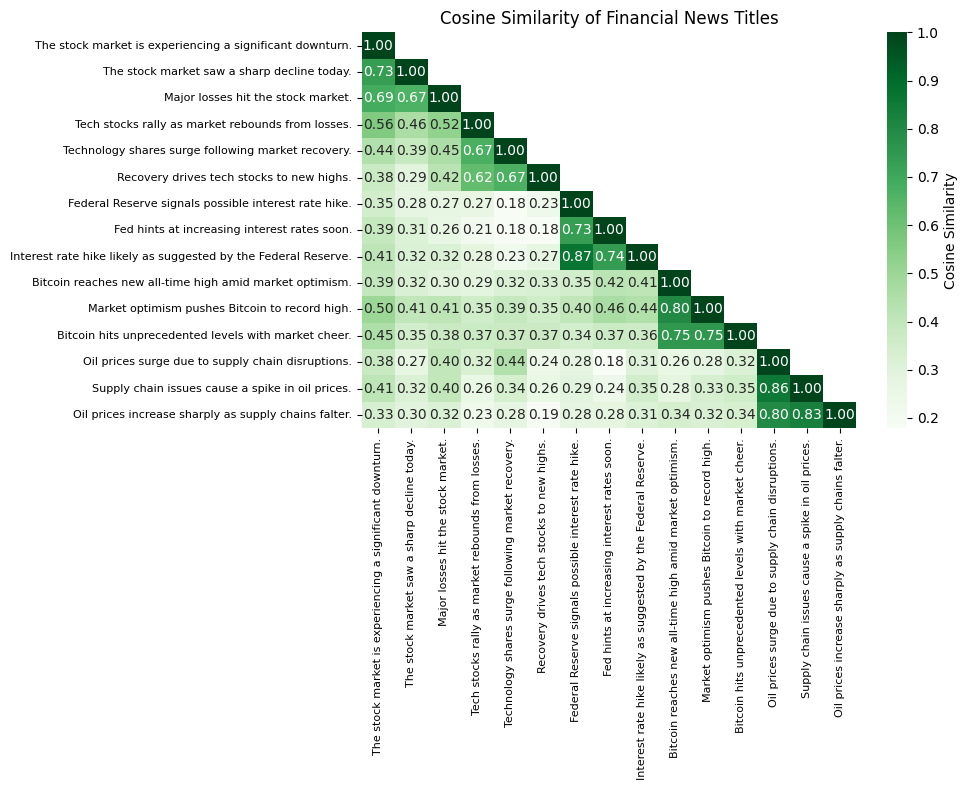

In [6]:
# Necessary pip installs
# pip install matplotlib sentence-transformers numpy seaborn

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

# Calculate cosine similarity
similarity_matrix = cosine_similarity(embeddings)

# Mask the lower triangle and the diagonal of the similarity matrix
mask = np.triu(np.ones_like(similarity_matrix, dtype=bool), k=1)

# Plot the cosine similarity matrix as a half heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, annot=True, mask=mask, cmap="Greens", fmt=".2f", 
            xticklabels=titles, yticklabels=titles, cbar_kws={'label': 'Cosine Similarity'})
plt.xticks(rotation=90, ha='center', fontsize=8)
plt.yticks(rotation=0, fontsize=8)
plt.title('Cosine Similarity of Financial News Titles')
plt.tight_layout()
plt.show()

2. **Visualization:** As we demonstrated earlier, visualizing these embeddings can provide insights. Similar embeddings should cluster together in charts, showing that they capture the underlying context effectively. This way, we can visually validate that the embeddings represent the nuances of the text.

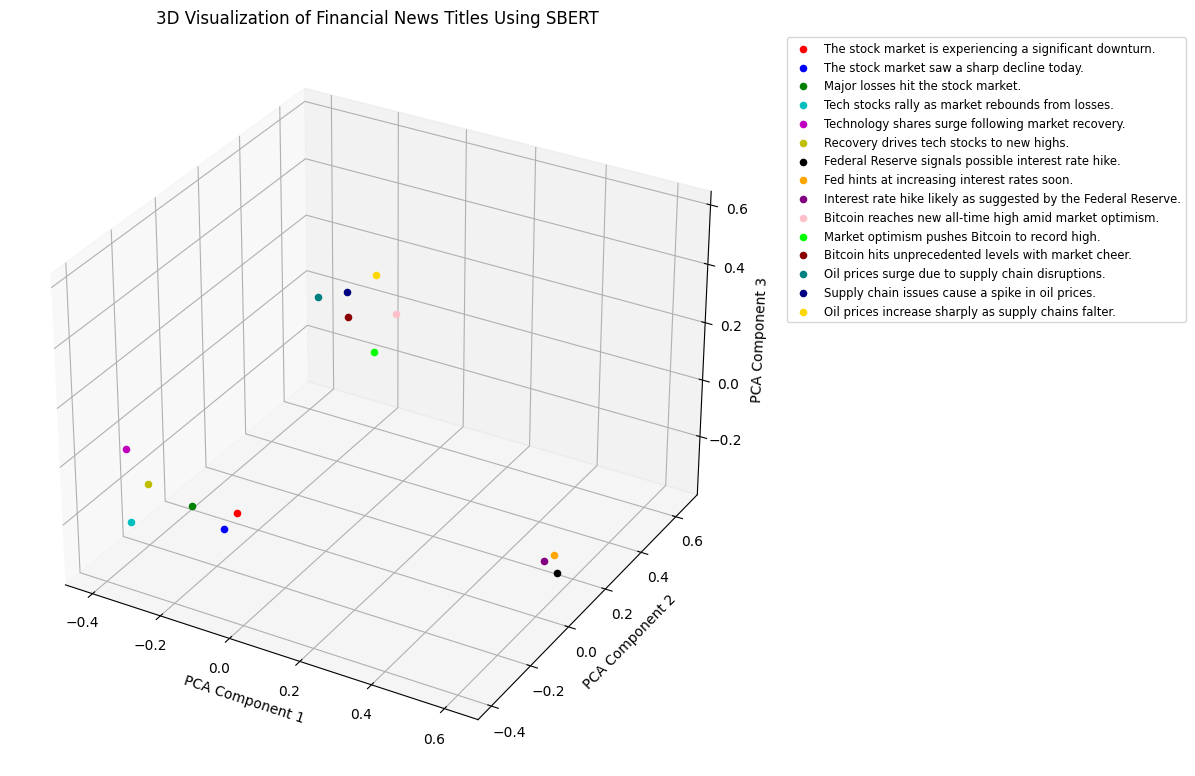

In [9]:
# import necessary packages
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce dimensions (vector length from 384 to 3) to 3D for visualization using PCA 
pca = PCA(n_components=3) # PCA used for simplicity. 
reduced_embeddings = pca.fit_transform(embeddings)

# Plot the embeddings
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Unique colors for each title
colors = [
    'r', 'b', 'g', 'c', 'm', 'y', 'k', 'orange', 'purple', 'pink',
    'lime', 'darkred', 'teal', 'navy', 'gold', 'olive', 'slateblue', 'coral', 'deeppink', 'peru'
]

# Collect plot handles for the legend
handles = []
for i, embedding in enumerate(reduced_embeddings):
    x, y, z = embedding
    scatter = ax.scatter(x, y, z, color=colors[i])
    # Create a legend handle for each point
    handles.append(scatter)

# Add a legend outside the plot
ax.legend(handles, titles, loc='upper left', bbox_to_anchor=(1.05, 1), fontsize='small')

# Setting labels
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
plt.title('3D Visualization of Financial News Titles Using SBERT')

# Adjust layout to accommodate legend
plt.tight_layout(rect=[0, 0, 0.75, 1])

plt.show()

#### A few insights based on the results:

- **Clustering of Similar Titles:** The plot effectively shows how SBERT captures and differentiates between semantically similar financial news titles. Titles discussing similar events, such as the stock market downturn, are closely clustered together. For instance, "The stock market is experiencing a significant downturn.", "The stock market saw a sharp decline today.", and "Major losses hit the stock market." are grouped closely. This clustering indicates that SBERT has effectively captured their semantic similarity, even though the phrasings differ. Similarly, titles about tech stock rallies, interest rate hikes, Bitcoin's market performance, and oil prices form distinct clusters. For example, titles like "Tech stocks rally as market rebounds from losses.", "Technology shares surge following market recovery.", and "Recovery drives tech stocks to new highs." are grouped together, reflecting their similar contexts. This clustering pattern demonstrates SBERT's ability to understand and encode the semantic content of these news titles accurately.

- **Distinct Clusters:** Titles about different events are spread apart. Titles discussing interest rate hikes by the Federal Reserve, such as "Federal Reserve signals possible interest rate hike.", "Fed hints at increasing interest rates soon.", and "Interest rate hike likely as suggested by the Federal Reserve.", form a distinct cluster. This separation from those discussing the stock market or Bitcoin indicates clear differentiation in context and subject matter. Similarly, titles about oil prices, like "Oil prices surge due to supply chain disruptions.", "Supply chain issues cause a spike in oil prices.", and "Oil prices increase sharply as supply chains falter.", also form a distinct and clear cluster. These groupings highlight how SBERT can differentiate between various financial events, even when they are reported differently.

#### Considerations in Interpretation
- Cosine similarity captures overall semantic closeness but might miss finer nuances such as tone or specific entity relationships.
- High similarity scores suggest semantic similarity, but small differences in scores might not always be meaningful. It's crucial to set appropriate thresholds for what constitutes "similar" in your context.

---

### Related Articles
- [Financial News Strategy | 1. Sourcing Financial News]()
- [Financial News Strategy | 2. Sentence Embeddings (This Article)]()
- [Financial News Strategy | 3. Embeddings Dimensionality Reduction]() **to be released
- [Financial News Strategy | 4. Clustering Financial News]() **to be released

---

### Optimized Embedding Processor with GPU Support for Sentence Transformers
Here you have a Python class, `EmbeddingsProcessor`, that manages the efficient computation and caching of sentence embeddings using the SentenceTransformer library. It dynamically selects the optimal device (NVIDIA CUDA, Apple MPS, AMD ROCm, or CPU) for processing, normalizes embeddings, and caches them to reduce redundant computations. This facilitates scalable and performance-optimized embedding generation. 

In [16]:
import os
import pickle
import torch
from sentence_transformers import SentenceTransformer
from typing import List, Dict

class EmbeddingsProcessor:
    def __init__(self, model: SentenceTransformer, cache_path: str, device: str = None):
        """
        Initializes the EmbeddingsProcessor with a SentenceTransformer model,
        a path for caching embeddings, and an optional device specification.

        Parameters:
        model (SentenceTransformer): The SentenceTransformer model used for generating embeddings.
        cache_path (str): Path to store the cache of embeddings.
        device (str): Preferred device for computation ('cuda', 'mps', 'cpu', or None).
                      If None, the best available device will be used.
        """
        self.model = model
        self.cache_path = cache_path
        self.device = self._get_device(device)  # Determine the best available device
        self.embeddings_cache = self._load_embeddings_cache()  # Load cached embeddings if available

    def _get_device(self, preferred_device: str = None) -> torch.device:
        """
        Determines the best available device for computation.

        Parameters:
        preferred_device (str): The preferred device (optional).

        Returns:
        torch.device: The best available device.
        """
        if preferred_device:
            # Attempt to use the preferred device
            device = torch.device(preferred_device)
            if device.type == 'cuda' and torch.cuda.is_available():
                return device
            elif device.type == 'mps' and torch.backends.mps.is_available():
                return device
            elif device.type == 'rocm' and torch.cuda.is_available():
                return device  # ROCm is detected as CUDA
        # Default to the best available device
        if torch.cuda.is_available():
            return torch.device('cuda')
        elif torch.backends.mps.is_available():
            return torch.device('mps')
        else:
            return torch.device('cpu')

    def _load_embeddings_cache(self) -> Dict[str, torch.Tensor]:
        """
        Loads embeddings cache from the specified file path.

        Returns:
        dict: The loaded embeddings cache or an empty dictionary if the cache does not exist.
        """
        if os.path.exists(self.cache_path):
            # Load the cache if the file exists
            with open(self.cache_path, 'rb') as f:
                return pickle.load(f)
        return {}  # Return an empty dictionary if the cache file does not exist

    def _save_embeddings_cache(self):
        """
        Saves the current embeddings cache to the specified file path.
        """
        with open(self.cache_path, 'wb') as f:
            pickle.dump(self.embeddings_cache, f)

    def _compute_embeddings(self, corpus: List[str]) -> torch.Tensor:
        """
        Computes and caches embeddings for a given corpus of texts.

        Parameters:
        corpus (list): A list of texts to compute embeddings for.

        Returns:
        torch.Tensor: A tensor of normalized embeddings.
        """
        embeddings = []
        new_embeddings = {}
        for text in corpus:
            if text not in self.embeddings_cache:
                # Compute embedding if it's not already cached
                embedding = self.model.encode(text, convert_to_tensor=True)
                new_embeddings[text] = embedding.cpu()  # Store the embedding on CPU to save GPU memory
            else:
                new_embeddings[text] = self.embeddings_cache[text]
            embeddings.append(new_embeddings[text])

        if new_embeddings:
            # Update the cache if new embeddings were computed
            self.embeddings_cache.update(new_embeddings)
            self._save_embeddings_cache()

        # Stack embeddings into a single tensor
        embeddings_tensor = torch.stack(embeddings)
        embeddings_tensor = embeddings_tensor.to(self.device)  # Move the tensor to the desired device
        # Normalize the embeddings by their norms
        norms = embeddings_tensor.norm(p=2, dim=1, keepdim=True)
        normalized_embeddings = embeddings_tensor.div(norms)
        return normalized_embeddings

    def process_batch(self, corpus: List[str]) -> torch.Tensor:
        """
        Processes a batch of texts and returns their embeddings.

        Parameters:
        corpus (list): A list of texts to process.

        Returns:
        torch.Tensor: A tensor of embeddings for the given texts.
        """
        embeddings = self._compute_embeddings(corpus)
        return embeddings

# Example usage of the EmbeddingsProcessor
# Load a SentenceTransformer model
model = SentenceTransformer('sentence-transformers/[all-MiniLM-L6-v2](https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2)')
# Path to store the embeddings cache
cache_path = 'embeddings_cache.pkl'
# Initialize the processor
processor = EmbeddingsProcessor(model, cache_path)

# Example corpus of texts
corpus = titles # Using the financial news titles from the previous example
# Process the corpus to get embeddings
embeddings = processor.process_batch(corpus)
print(corpus[0], embeddings[0][0:10]) # you can see here that for the first title, SBERT has generated a 384-dimensional embedding (only 10 dimensions are shown here to avoid a long output)

The stock market is experiencing a significant downturn. tensor([ 0.0315, -0.0482,  0.0491,  0.0356, -0.0831,  0.0144, -0.0546,  0.0748,
         0.0136, -0.0191], device='mps:0')
